In [2]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
import pandas as pd
from matplotlib.colors import LogNorm

In [3]:
size= 909096
size_all = 7737578
mean = 0.0013215205 
std = 0.015272634

Select NuTau events from the DataSet

In [3]:
data = np.memmap('/fastio2/dasha/double_pulse/nu_data.npy', mode = 'r', dtype ='float32', shape = (size_all,300,60))
lab = np.memmap('/fastio2/dasha/double_pulse/nu_label.npy', mode = 'r', dtype ='float32', shape = (size_all))
info= np.memmap('/fastio2/dasha/double_pulse/nu_info.npy', mode = 'r', dtype ='float32', shape = (size_all,3))

In [4]:
data_2 = np.memmap('/fastio2/dasha/double_pulse/data_2.npy', mode = 'w+', dtype ='float32', shape=(size,300,60))
info_2 = np.memmap('/fastio2/dasha/double_pulse/info_2.npy', mode = 'w+', dtype ='float32', shape=(size,3))
pos = 0
for i,l in enumerate(lab):
    if l == 4:
        data_2[pos:pos+1] = (data[i]/10**(-8)-mean)/std
        info_2[pos:pos+1] = info[i]
        pos = pos +1

In [5]:
print(np.max(data[0]),np.min(data[0]))
print(np.max(data_2[0]),np.min(data_2[0]))

2.3898442e-10 -2.119134e-12
13.4338665 -0.14633676


In [6]:
print(len(data_2),len(info_2))

909096 909096


Load prepared NuTau Data

In [4]:
data = np.memmap('/fastio2/dasha/double_pulse/data_2.npy', mode = 'r', dtype ='float32', shape=(size,300,60,1))
info = np.memmap('/fastio2/dasha/double_pulse/info_2.npy', mode = 'r', dtype ='float32', shape=(size,3))

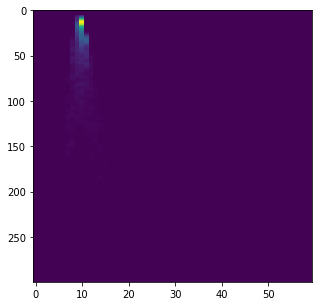

In [4]:
im = data[0].reshape(300,60)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.imshow(im, interpolation='nearest', aspect='auto', cmap= 'viridis') 

In [6]:
print(len(data),len(info))

909096 909096


Get probabilities from the images

In [3]:
from keras.models import load_model
model = load_model('/data/dfc13/DoublePulse/Models/Arch01/DP_model_6006.h5')
model.summary()

Using TensorFlow backend.
W1023 13:19:27.427424 139689136854784 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1023 13:19:27.453247 139689136854784 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1023 13:19:27.472184 139689136854784 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1023 13:19:27.517038 139689136854784 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 251, 51, 32)       16032     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 25, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 101, 21, 64)       256064    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 8, 32)         92192     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 4, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [7]:
pred = model.predict(data)

In [8]:
print(len(pred))
print(pred[:5])

909096
[[3.9312649e-01 6.0687351e-01]
 [6.5758765e-01 3.4241238e-01]
 [7.7357554e-14 1.0000000e+00]
 [2.1656571e-01 7.8343433e-01]
 [4.8696062e-01 5.1303935e-01]]


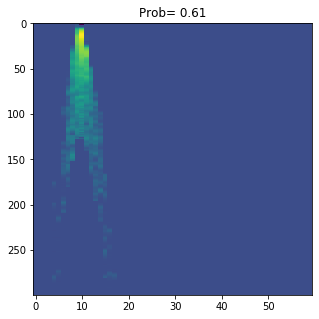

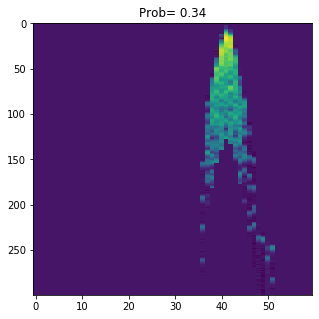

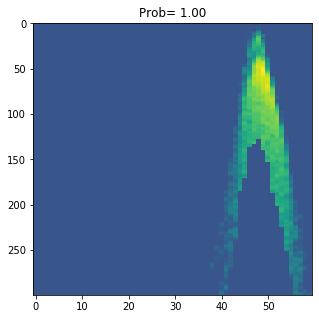

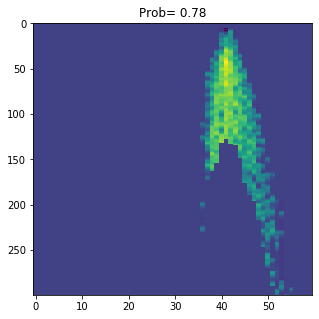

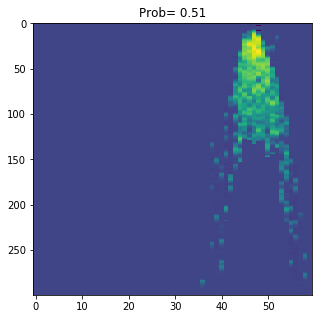

In [9]:
for i, pr in enumerate(pred[:5]):
    title = "Prob= {0:.2f}".format(pr[1])
    im = data[i].reshape(300,60)
    mn = np.min(im)
    im = im+abs(1.1*mn)
    fig = plt.figure(figsize=(5, 5))
    plt.title(title)
    plt.imshow(im, interpolation='nearest', aspect='auto', norm=LogNorm(), cmap= 'viridis')
    

Load INFO files

In [5]:
info_full = []
for name in glob.glob('/home/dup193/work/double_pulse/data/Nu_all/NuTauCC*_info.pkl'):
    #print(name)
    x = np.load(name, mmap_mode="r",allow_pickle=True)
    info_full = info_full+x 

In [9]:
print(len(info_full))
print(info_full[0])

909096
{'index': 0, 'tau_length': 13.830035707584367, 'tau_position': (93.49713464867875, -455.45654837209804, 483.82604908795906), 'qtotal': 10481.575017957017, 'tau_energy': 61353.60585355268, 'strings': {'charge': 9539.200017357245, 'doms': array([{'dom_position': (114.38999938964844, -461.989990234375, 498.6600036621094), 'key': (4, 1), 'qdom': 1335.725001603365},
       {'dom_position': (114.38999938964844, -461.989990234375, 481.6400146484375), 'key': (4, 2), 'qdom': 2819.5999957621098},
       {'dom_position': (114.38999938964844, -461.989990234375, 464.6199951171875), 'key': (4, 3), 'qdom': 2744.775010243058},
       {'dom_position': (114.38999938964844, -461.989990234375, 447.6000061035156), 'key': (4, 4), 'qdom': 1484.6750079989433},
       {'dom_position': (114.38999938964844, -461.989990234375, 430.5799865722656), 'key': (4, 5), 'qdom': 781.7000010311604},
       {'dom_position': (114.38999938964844, -461.989990234375, 413.55999755859375), 'key': (4, 6), 'qdom': 275.2250006

In [8]:
wn = np.load('/home/dup193/work/double_pulse/Weird_nutau.npy',allow_pickle=True)
set_wn = set(wn[:,0]) 
print(set_wn)

{(262, 4294967295, 791, 0), (6055, 4294967295, 391, 0), (5406, 4294967295, 245, 0), (2987, 4294967295, 738, 0), (9622, 4294967295, 543, 0), (2143, 4294967295, 617, 0), (3207, 4294967295, 20, 0), (3492, 4294967295, 642, 0), (5564, 4294967295, 700, 0), (2499, 4294967295, 428, 0), (2300, 4294967295, 198, 0), (9184, 4294967295, 108, 0), (8379, 4294967295, 727, 0), (9572, 4294967295, 31, 0), (8211, 4294967295, 633, 0), (5110, 4294967295, 527, 0), (11227, 4294967295, 315, 0), (9646, 4294967295, 637, 0), (4505, 4294967295, 689, 0), (6192, 4294967295, 577, 0), (7215, 4294967295, 494, 0), (2686, 4294967295, 286, 0), (5267, 4294967295, 428, 0), (4743, 4294967295, 71, 0), (9542, 4294967295, 699, 0), (6601, 4294967295, 6, 0), (3433, 4294967295, 593, 0), (6545, 4294967295, 686, 0), (512, 4294967295, 52, 0), (7146, 4294967295, 170, 0), (5557, 4294967295, 429, 0), (3278, 4294967295, 38, 0), (8736, 4294967295, 730, 0), (8554, 4294967295, 553, 0), (11282, 4294967295, 199, 0), (4328, 4294967295, 291, 0)

In [10]:
nums = []
for i,inf in enumerate(info_full):
    if inf['id'] in set_wn:
        nums.append(i)
print(nums)

[5107, 15779, 17617, 20065, 21908, 25670, 27377, 27867, 42417, 48446, 55454, 59700, 66661, 75479, 89059, 91091, 94974, 97321, 97794, 102243, 102609, 104723, 111860, 113743, 118633, 118649, 119017, 122510, 128935, 135723, 143822, 144236, 145230, 146600, 150301, 151549, 157833, 158193, 165904, 167402, 171888, 177981, 182299, 184960, 187086, 188278, 191116, 196613, 199193, 201293, 203462, 203492, 205175, 205232, 205567, 213181, 218158, 219441, 221492, 223571, 224794, 229365, 238714, 238795, 245551, 246039, 248917, 252841, 253260, 256852, 257052, 258028, 259345, 267977, 273736, 274957, 277747, 283280, 289533, 294110, 295179, 298604, 299631, 305392, 305723, 314898, 319581, 328556, 330360, 330468, 332548, 334270, 343375, 345116, 348837, 356644, 359106, 366393, 367773, 376253, 378098, 380342, 381930, 385676, 386917, 397997, 398954, 403016, 403363, 403873, 404323, 405248, 410172, 412134, 418372, 420406, 422066, 422970, 423135, 425753, 429072, 431181, 432282, 434234, 438542, 440233, 440432, 441

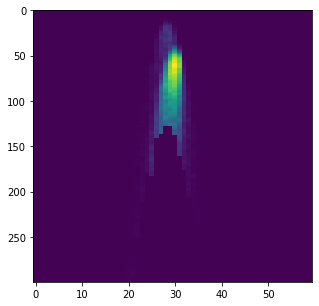

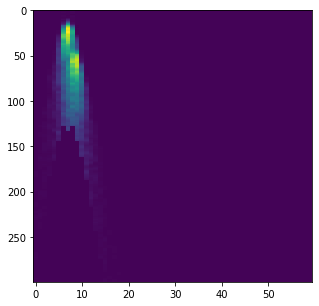

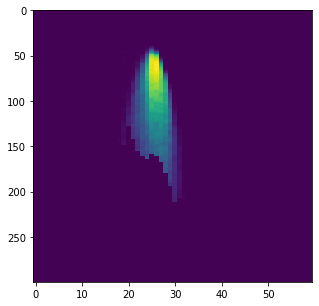

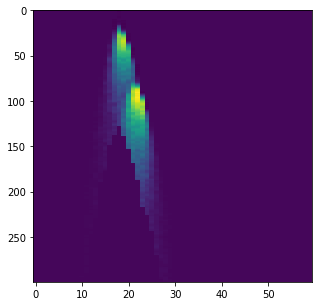

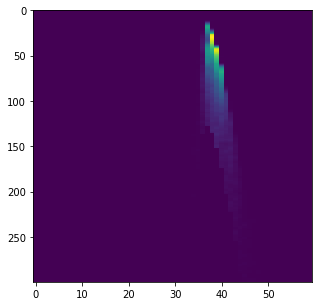

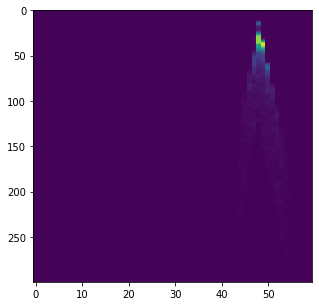

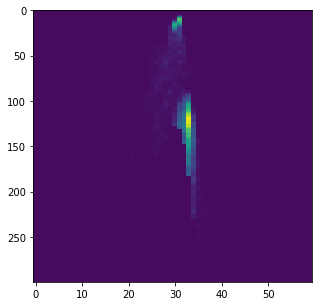

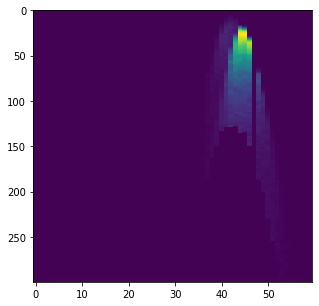

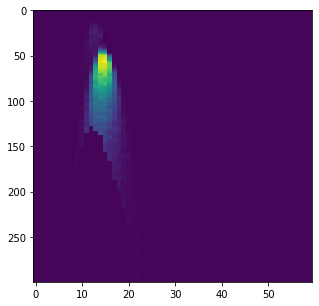

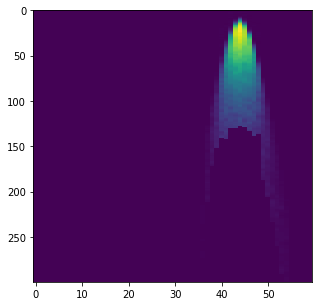

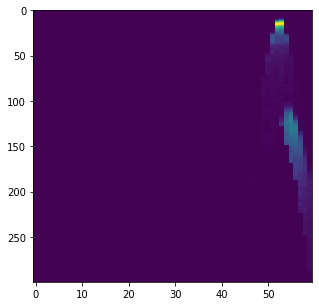

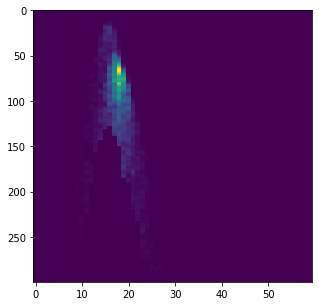

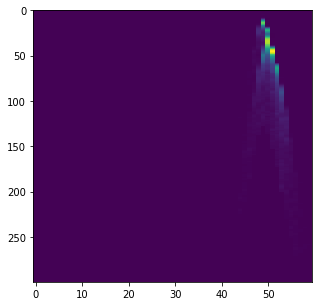

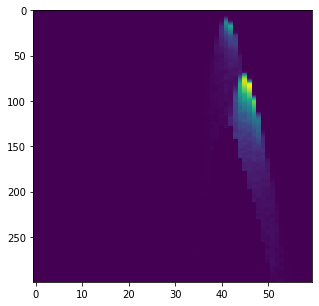

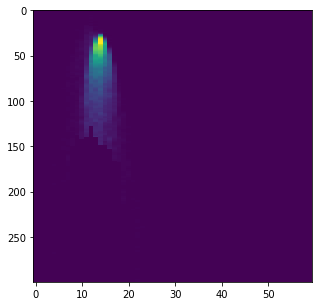

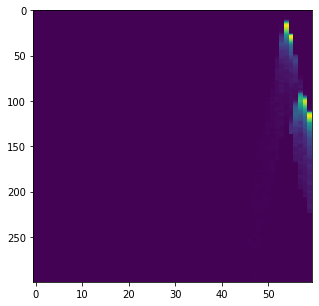

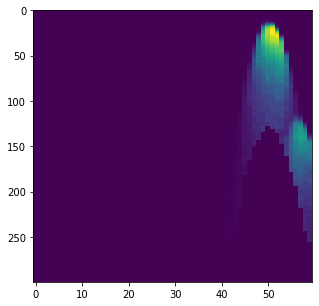

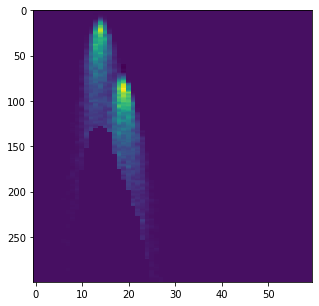

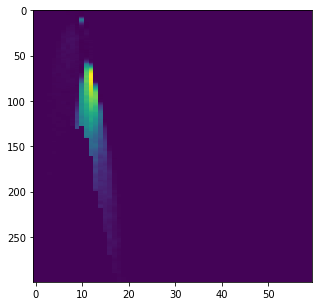

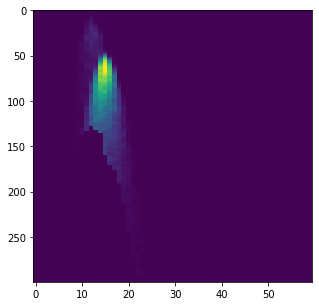

In [13]:
for i in nums[:20]:
    im = data[i].reshape(300,60)
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.imshow(im, interpolation='nearest', aspect='auto', cmap= 'viridis') 

In [ ]:
if_df = pd.DataFrame(list(info_full))
print(if_df['id'][:10])
print(if_df.shape)

In [ ]:
if_df['Predict'] = pred[:,1]
print(if_df.shape)
if_df.head()

In [21]:
if_df.to_pickle("/home/dup193/work/double_pulse/data/make_plot/MakePlot_INFO_FULL_withPred.pkl")

In [5]:
if_df = pd.read_pickle("/home/dup193/work/double_pulse/data/make_plot/MakePlot_INFO_FULL_withPred.pkl")

In [3]:
if_df.head()

,index,tau_length,tau_position,qtotal,tau_energy,strings,tau_direction,nu_energy,id,tau_time,Predict
0,0,13.830036,"(93.49713464867875, -455.45654837209804, 483.8...",10481.575018,6.135361e+04,"{'charge': 9539.200017357245, 'doms': [{'dom_p...","(0.8316361639240657, 1.0664836860991989)",1.764140e+05,"(6200, 4294967295, 9, 0)","(9765.4369073187, 9811.568940359874)",0.606874
1,1,258.186233,"(-28.992322673004765, -49.71384706663298, 746....",2816.199994,2.595464e+06,"{'charge': 1615.4249928593636, 'doms': [{'dom_...","(1.1085146538940147, 2.6672259609138083)",2.610106e+06,"(6200, 4294967295, 34, 0)","(8114.734026278837, 8975.950599218739)",0.342412
2,2,46.873881,"(-453.54235990415964, 530.7603444386214, 261.8...",8398.825006,3.499766e+05,"{'charge': 7539.225005183369, 'doms': [{'dom_p...","(1.3694729341617133, 2.1773364635433383)",6.105237e+05,"(6200, 4294967295, 39, 0)","(9308.220481750894, 9464.574918643888)",1.000000
3,3,8.643401,"(154.63107721740835, -177.03119708500526, 6.03...",10983.525017,1.329098e+05,"{'charge': 7263.775016978383, 'doms': [{'dom_p...","(1.167117033059264, 4.309914433237183)",1.371414e+05,"(6200, 4294967295, 50, 0)","(9630.556115432493, 9659.387398868668)",0.783434
4,4,321.185269,"(-441.9098687720061, -164.8779484412753, -652....",6030.250001,4.069384e+06,"{'charge': 1478.4500005785376, 'doms': [{'dom_...","(1.2824561807613832, 0.8364174655540911)",5.823521e+06,"(6200, 4294967295, 59, 0)","(9052.635371064593, 10123.994107537608)",0.513039


In [4]:
if_df2 = if_df[(if_df["Predict"] == 1) & (if_df['nu_energy'] < 10000)].copy() 

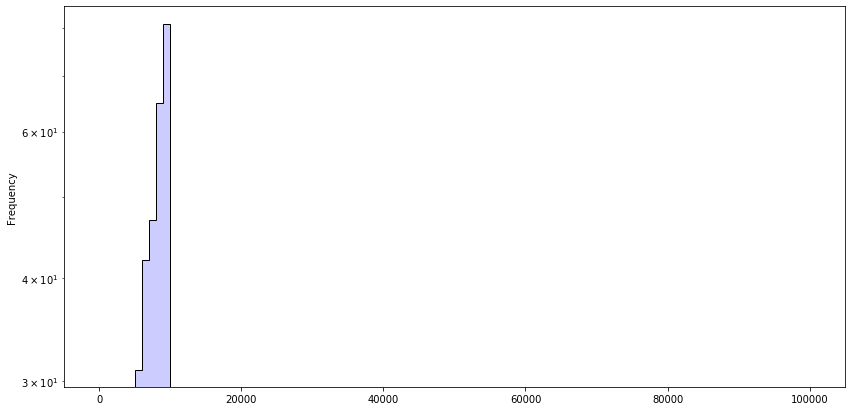

In [5]:
ax = if_df2['nu_energy'].plot.hist(figsize = (14,7),bins = 100, range= [0,100000], logy= True, histtype ='step',  fill=True, fc=(0, 0, 1, 0.2), edgecolor = 'k', label = ">0")#xlim =[0,1000], ylim = [10**(-4),10**(-0)])

In [9]:
nutau_1 = []
for i, row in if_df.iterrows():
    if (row['Predict'] == 1) and (row['nu_energy'] < 10000):
        nutau_1.append([row['id'],row['tau_length']]) 

In [10]:
print(len(nutau_1))
print(nutau_1[0])

266
[(6265, 4294967295, 477, 0), 0.1509026478888223]


In [11]:
np.save('/home/dup193/work/double_pulse/Weird_nutau.npy', nutau_1)

index                                                         5107
tau_length                                                0.150903
tau_position     (-570.2095822577944, -108.28019458569361, 286....
qtotal                                                     2296.75
tau_energy                                                 5264.79
strings          {'charge': 2215.8749702759087, 'doms': [{'dom_...
tau_direction             (1.4189946085109466, 1.5756418766363545)
nu_energy                                                  8198.63
id                                      (6265, 4294967295, 477, 0)
tau_time                      (9801.8304077043, 9802.333764785035)
Predict                                                          1
Name: 5107, dtype: object
index                                                          449
tau_length                                               0.0500001
tau_position     (-48.17837324616448, 302.7618050347305, -326.9...
qtotal                              

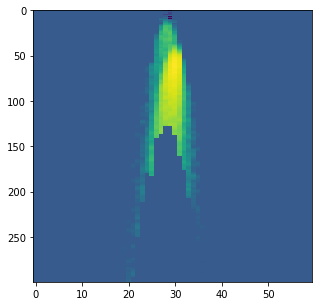

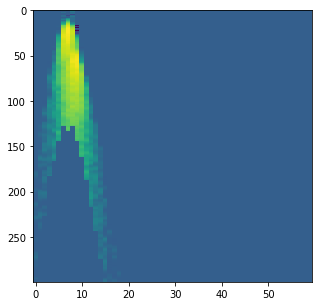

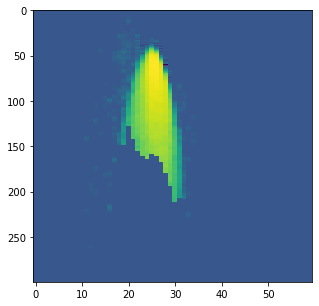

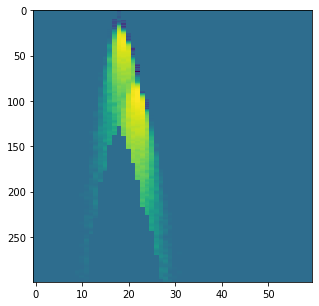

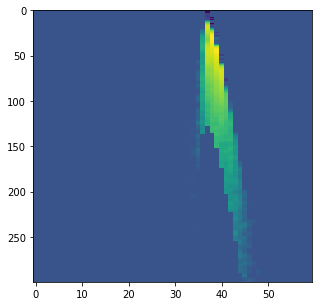

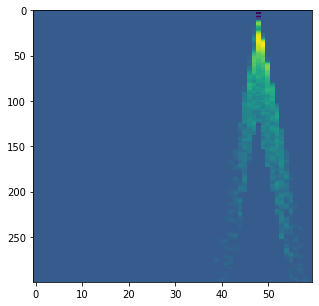

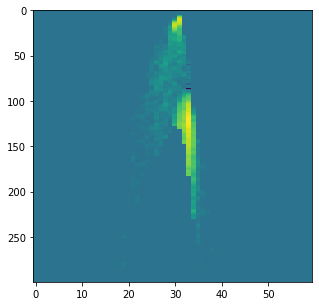

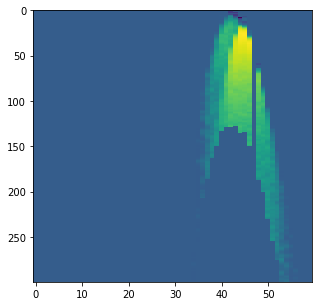

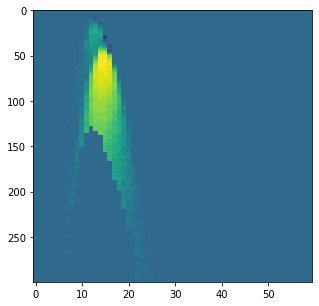

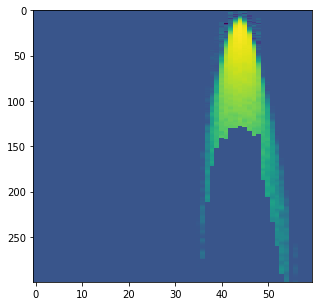

In [132]:
for i in nutau_1[:10]:
        im = data[i[0]].reshape(300,60)
        mn = np.min(im)
        im = im+abs(1.1*mn)
      #  print(np.max(im), np.min(im))
        fig = plt.figure(figsize=(5, 5))
       # ax.set_title('{0},{1}'.format(i[0],i[1]))
        ax = fig.add_subplot(111)
        ax.imshow(im, interpolation='nearest', aspect='auto', norm=LogNorm(), cmap= 'viridis')
        print(i[1])

In [26]:
save_id = []
for i in nutau_1:
    save_id.append([i['id'],i['tau_length']])

NameError: name 'nutau_1' is not defined

Load dataframe with plot Data

In [6]:
p_df = pd.read_pickle("/home/dup193/work/double_pulse/data/make_plot/MakePlot_DF_All.pkl")

In [20]:
print(p_df[b'ID'][:10])
p_df = p_df.rename(columns={b'ID': 'id'})
print(p_df['id'][:10])
print(p_df.shape)

0     (1, 4294967295, 0, 0)
1     (1, 4294967295, 1, 0)
2     (1, 4294967295, 6, 0)
3     (1, 4294967295, 9, 0)
4    (1, 4294967295, 10, 0)
5    (1, 4294967295, 11, 0)
6    (1, 4294967295, 16, 0)
7    (1, 4294967295, 24, 0)
8    (1, 4294967295, 26, 0)
9    (1, 4294967295, 27, 0)
Name: b'ID', dtype: object
0     (1, 4294967295, 0, 0)
1     (1, 4294967295, 1, 0)
2     (1, 4294967295, 6, 0)
3     (1, 4294967295, 9, 0)
4    (1, 4294967295, 10, 0)
5    (1, 4294967295, 11, 0)
6    (1, 4294967295, 16, 0)
7    (1, 4294967295, 24, 0)
8    (1, 4294967295, 26, 0)
9    (1, 4294967295, 27, 0)
Name: id, dtype: object
(4342931, 20)


In [21]:
df2 = if_df2.merge(p_df,how='inner', on ='id')

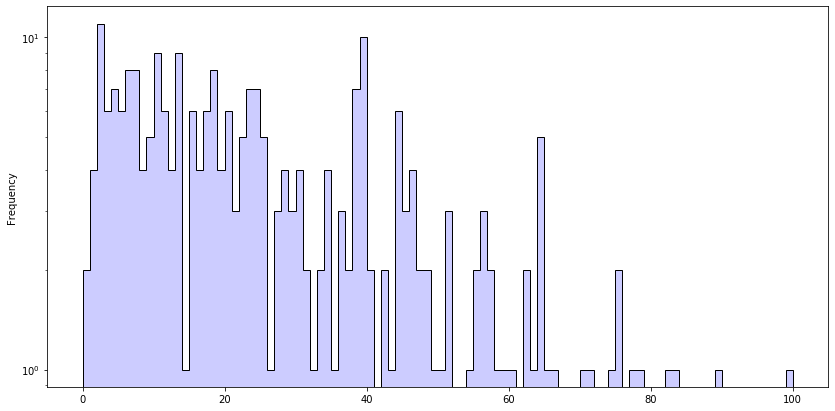

In [25]:
ax = df2[b'Distance'].plot.hist(figsize = (14,7),bins = 100, range= [0,100], logy= True, histtype ='step',  fill=True, fc=(0, 0, 1, 0.2), edgecolor = 'k', label = ">0")#xlim =[0,1000], ylim = [10**(-4),10**(-0)])

Merge PLOT and INFO dataframes on ID

In [38]:
df = if_df.merge(p_df,how='inner', on ='id')
#df2 = df.query("id in @set_id")

In [39]:
print(df['id'][:10])
print(df.shape)
df.head()

0     (6200, 4294967295, 9, 0)
1    (6200, 4294967295, 34, 0)
2    (6200, 4294967295, 39, 0)
3    (6200, 4294967295, 50, 0)
4    (6200, 4294967295, 59, 0)
5    (6200, 4294967295, 68, 0)
6    (6200, 4294967295, 71, 0)
7    (6200, 4294967295, 73, 0)
8    (6200, 4294967295, 77, 0)
9    (6200, 4294967295, 83, 0)
Name: id, dtype: object
(905914, 30)


,index,tau_length,tau_position,qtotal,tau_energy,strings,tau_direction,nu_energy,id,tau_time,...,St_x,St_y,St_z,Qtot_a,Qtot_b,St_1,St_2,St_3,Qst_2,Qst_3
0,0,13.830036,"(93.49713464867875, -455.45654837209804, 483.8...",10481.575018,6.135361e+04,"{'charge': 9539.200017357245, 'doms': [{'dom_p...","(0.8316361639240657, 1.0664836860991989)",1.764140e+05,"(6200, 4294967295, 9, 0)","(9765.4369073187, 9811.568940359874)",...,114.389999,-461.989990,405.050001,10431.975018,10487.025018,4.0,3.0,10.0,489.075001,293.149999
1,1,258.186233,"(-28.992322673004765, -49.71384706663298, 746....",2816.199994,2.595464e+06,"{'charge': 1615.4249928593636, 'doms': [{'dom_...","(1.1085146538940147, 2.6672259609138083)",2.610106e+06,"(6200, 4294967295, 34, 0)","(8114.734026278837, 8975.950599218739)",...,326.850006,-209.070007,430.340000,2784.149994,2820.724994,20.0,13.0,21.0,908.800000,171.500001
2,2,46.873881,"(-453.54235990415964, 530.7603444386214, 261.8...",8398.825006,3.499766e+05,"{'charge': 7539.225005183369, 'doms': [{'dom_p...","(1.3694729341617133, 2.1773364635433383)",6.105237e+05,"(6200, 4294967295, 39, 0)","(9308.220481750894, 9464.574918643888)",...,-347.880005,451.519989,229.673809,8358.250006,8402.375006,75.0,68.0,69.0,548.550001,158.000000
3,3,8.643401,"(154.63107721740835, -177.03119708500526, 6.03...",10983.525017,1.329098e+05,"{'charge': 7263.775016978383, 'doms': [{'dom_p...","(1.167117033059264, 4.309914433237183)",1.371414e+05,"(6200, 4294967295, 50, 0)","(9630.556115432493, 9659.387398868668)",...,124.970001,-131.250000,61.327500,11154.150018,11215.875018,27.0,19.0,28.0,2177.600001,781.200001
4,4,321.185269,"(-441.9098687720061, -164.8779484412753, -652....",6030.250001,4.069384e+06,"{'charge': 1478.4500005785376, 'doms': [{'dom_...","(1.2824561807613832, 0.8364174655540911)",5.823521e+06,"(6200, 4294967295, 59, 0)","(9052.635371064593, 10123.994107537608)",...,-492.429993,-230.160004,-392.337856,5998.000000,6046.525001,22.0,23.0,32.0,932.099999,804.574998


In [41]:
print(df.id[:10])
print(df.Predict[:10])

0     (6200, 4294967295, 9, 0)
1    (6200, 4294967295, 34, 0)
2    (6200, 4294967295, 39, 0)
3    (6200, 4294967295, 50, 0)
4    (6200, 4294967295, 59, 0)
5    (6200, 4294967295, 68, 0)
6    (6200, 4294967295, 71, 0)
7    (6200, 4294967295, 73, 0)
8    (6200, 4294967295, 77, 0)
9    (6200, 4294967295, 83, 0)
Name: id, dtype: object
0    0.606874
1    0.342412
2    1.000000
3    0.783434
4    0.513039
5    0.263012
6    0.982958
7    0.514292
8    0.687749
9    0.694051
Name: Predict, dtype: float32


In [42]:
df.to_pickle("/home/dup193/work/double_pulse/data/make_plot/MakePlot_Merged_DF.pkl")

Load Merged dataframe

In [7]:
df = pd.read_pickle("/home/dup193/work/double_pulse/data/make_plot/MakePlot_Merged_DF.pkl")
print(df['id'][:10])
print(df.shape)

0     (6200, 4294967295, 9, 0)
1    (6200, 4294967295, 34, 0)
2    (6200, 4294967295, 39, 0)
3    (6200, 4294967295, 50, 0)
4    (6200, 4294967295, 59, 0)
5    (6200, 4294967295, 68, 0)
6    (6200, 4294967295, 71, 0)
7    (6200, 4294967295, 73, 0)
8    (6200, 4294967295, 77, 0)
9    (6200, 4294967295, 83, 0)
Name: id, dtype: object
(905914, 30)


In [8]:
df.head()

,index,tau_length,tau_position,qtotal,tau_energy,strings,tau_direction,nu_energy,id,tau_time,...,St_x,St_y,St_z,Qtot_a,Qtot_b,St_1,St_2,St_3,Qst_2,Qst_3
0,0,13.830036,"(93.49713464867875, -455.45654837209804, 483.8...",10481.575018,6.135361e+04,"{'charge': 9539.200017357245, 'doms': [{'dom_p...","(0.8316361639240657, 1.0664836860991989)",1.764140e+05,"(6200, 4294967295, 9, 0)","(9765.4369073187, 9811.568940359874)",...,114.389999,-461.989990,405.050001,10431.975018,10487.025018,4.0,3.0,10.0,489.075001,293.149999
1,1,258.186233,"(-28.992322673004765, -49.71384706663298, 746....",2816.199994,2.595464e+06,"{'charge': 1615.4249928593636, 'doms': [{'dom_...","(1.1085146538940147, 2.6672259609138083)",2.610106e+06,"(6200, 4294967295, 34, 0)","(8114.734026278837, 8975.950599218739)",...,326.850006,-209.070007,430.340000,2784.149994,2820.724994,20.0,13.0,21.0,908.800000,171.500001
2,2,46.873881,"(-453.54235990415964, 530.7603444386214, 261.8...",8398.825006,3.499766e+05,"{'charge': 7539.225005183369, 'doms': [{'dom_p...","(1.3694729341617133, 2.1773364635433383)",6.105237e+05,"(6200, 4294967295, 39, 0)","(9308.220481750894, 9464.574918643888)",...,-347.880005,451.519989,229.673809,8358.250006,8402.375006,75.0,68.0,69.0,548.550001,158.000000
3,3,8.643401,"(154.63107721740835, -177.03119708500526, 6.03...",10983.525017,1.329098e+05,"{'charge': 7263.775016978383, 'doms': [{'dom_p...","(1.167117033059264, 4.309914433237183)",1.371414e+05,"(6200, 4294967295, 50, 0)","(9630.556115432493, 9659.387398868668)",...,124.970001,-131.250000,61.327500,11154.150018,11215.875018,27.0,19.0,28.0,2177.600001,781.200001
4,4,321.185269,"(-441.9098687720061, -164.8779484412753, -652....",6030.250001,4.069384e+06,"{'charge': 1478.4500005785376, 'doms': [{'dom_...","(1.2824561807613832, 0.8364174655540911)",5.823521e+06,"(6200, 4294967295, 59, 0)","(9052.635371064593, 10123.994107537608)",...,-492.429993,-230.160004,-392.337856,5998.000000,6046.525001,22.0,23.0,32.0,932.099999,804.574998


In [9]:
list(df)

['index',
 'tau_length',
 'tau_position',
 'qtotal',
 'tau_energy',
 'strings',
 'tau_direction',
 'nu_energy',
 'id',
 'tau_time',
 'Predict',
 b'Distance',
 b'Energy',
 b'PDG',
 b'Qdom',
 b'Qst',
 b'StQArr',
 'CoG_x',
 'CoG_y',
 'CoG_z',
 'St_x',
 'St_y',
 'St_z',
 'Qtot_a',
 'Qtot_b',
 'St_1',
 'St_2',
 'St_3',
 'Qst_2',
 'Qst_3']

In [10]:
df_05 = df[df['Predict']>0.5].copy()
df_08 = df[df['Predict']>0.8].copy()
df_1 = df[df['Predict']==1].copy()

In [11]:
print(df.shape, df_05.shape ,df_08.shape, df_1.shape)

(905914, 30) (590500, 30) (243205, 30) (36784, 30)


In [12]:
df['Weights'] = np.ones(df.shape[0])/df.shape[0]
df_05['Weights'] = np.ones(df_05.shape[0])/df_05.shape[0]
df_08['Weights'] = np.ones(df_08.shape[0])/df_08.shape[0]
df_1['Weights'] = np.ones(df_1.shape[0])/df_1.shape[0]

In [13]:
for i in range(5):
    print(df['id'].iloc[i], df['Predict'].iloc[i],df_05['id'].iloc[i], df_05['Predict'].iloc[i],df_08['id'].iloc[i], df_08['Predict'].iloc[i],df_1['id'].iloc[i], df_1['Predict'].iloc[i])

(6200, 4294967295, 9, 0) 0.6068735 (6200, 4294967295, 9, 0) 0.6068735 (6200, 4294967295, 39, 0) 1.0 (6200, 4294967295, 39, 0) 1.0
(6200, 4294967295, 34, 0) 0.34241238 (6200, 4294967295, 39, 0) 1.0 (6200, 4294967295, 71, 0) 0.982958 (6201, 4294967295, 676, 0) 1.0
(6200, 4294967295, 39, 0) 1.0 (6200, 4294967295, 50, 0) 0.78343433 (6200, 4294967295, 178, 0) 0.8617318 (6202, 4294967295, 108, 0) 1.0
(6200, 4294967295, 50, 0) 0.78343433 (6200, 4294967295, 59, 0) 0.51303935 (6200, 4294967295, 200, 0) 0.986479 (6202, 4294967295, 734, 0) 1.0
(6200, 4294967295, 59, 0) 0.51303935 (6200, 4294967295, 71, 0) 0.982958 (6200, 4294967295, 209, 1) 0.99892324 (6202, 4294967295, 740, 0) 1.0


Make plots

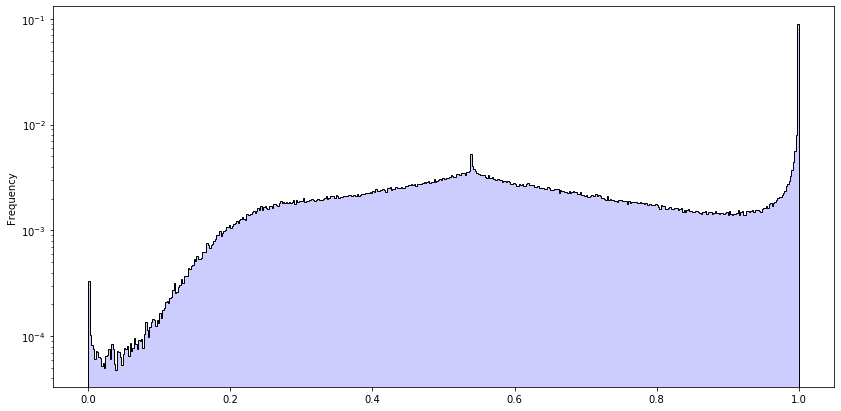

In [14]:
ax = df['Predict'].plot.hist(figsize = (14,7),bins = 500, logy= True, weights = df['Weights'], histtype ='step',  fill=True, fc=(0, 0, 1, 0.2), edgecolor = 'k', label = ">1TeV")#xlim =[0,1000], ylim = [10**(-4),10**(-0)])

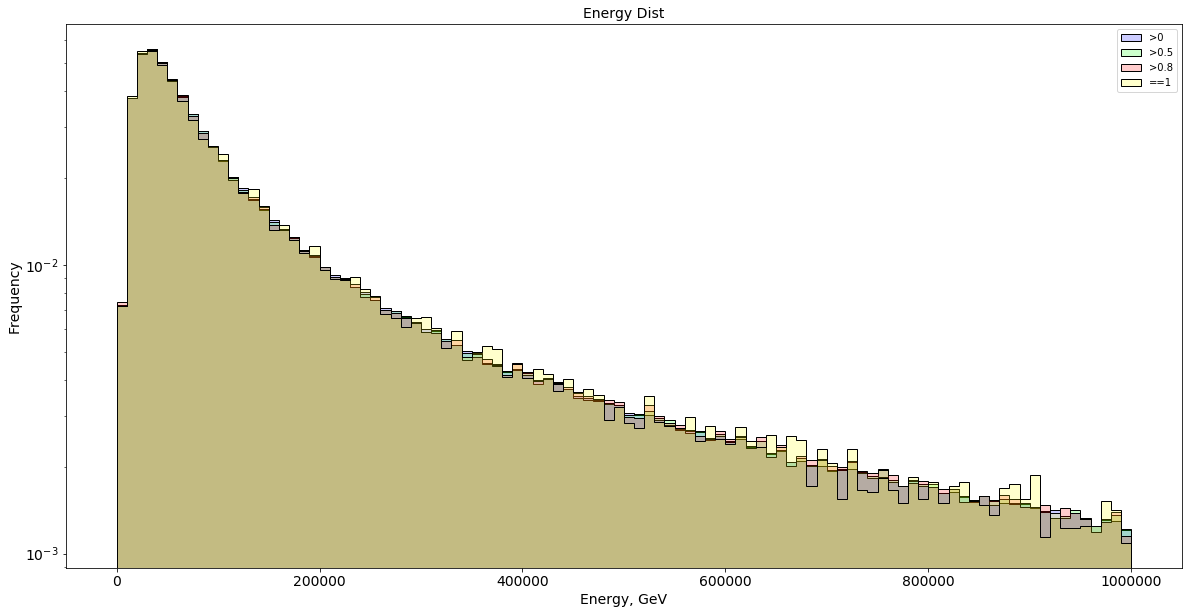

In [16]:
ax = df[b'Energy'].plot.hist(figsize = (20,10),bins = 100, range= [0,1000000], logy= True, weights = df['Weights'], histtype ='step',  fill=True, fc=(0, 0, 1, 0.2), edgecolor = 'k', label = ">0")#xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = df_05[b'Energy'].plot.hist(bins = 100, logy= True, range= [0,1000000],histtype ='step', weights = df_05['Weights'], fill=True, fc=(0, 1, 0, 0.2), edgecolor = 'k', label = ">0.5")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = df_08[b'Energy'].plot.hist(bins = 100, logy= True, range= [0,1000000],histtype ='step', weights = df_08['Weights'], fill=True, fc=(1, 0, 0, 0.2), edgecolor = 'k', label = ">0.8")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = df_1[b'Energy'].plot.hist(bins = 100, logy= True, range= [0,1000000],histtype ='step',  weights = df_1['Weights'], fill=True, fc=(1, 1, 0, 0.2), edgecolor = 'k', label = "==1")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax.set_title('Energy Dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_xlabel("Energy, GeV",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_ylabel("Frequency",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(labelsize=14)
plt.legend()

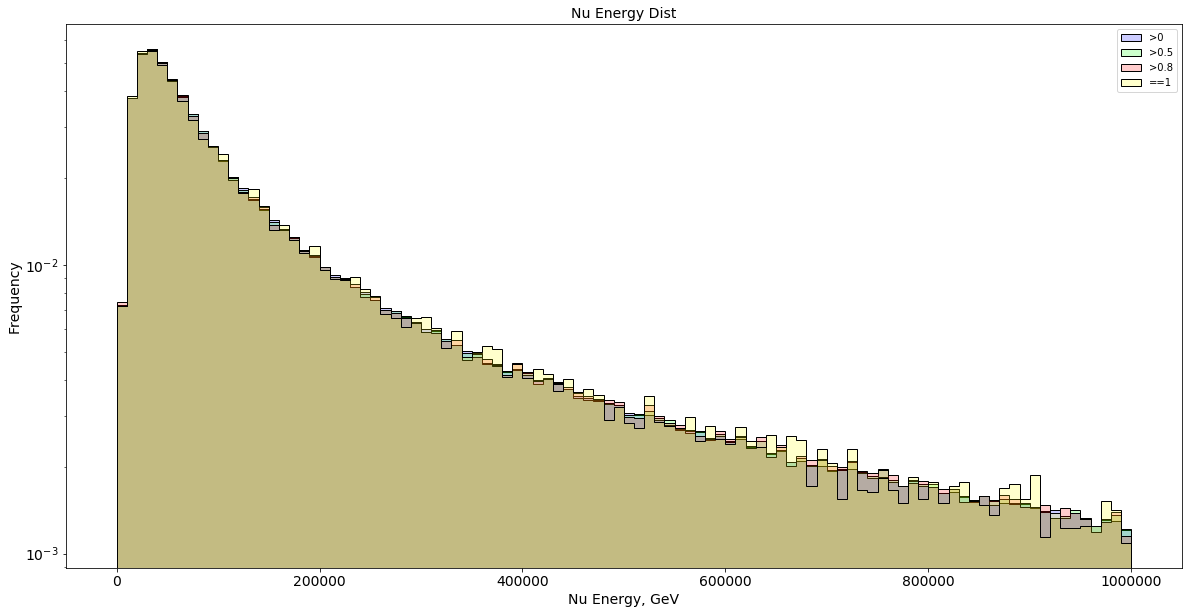

In [18]:
ax = df['nu_energy'].plot.hist(figsize = (20,10),bins = 100, range= [0,1000000], logy= True, weights = df['Weights'], histtype ='step',  fill=True, fc=(0, 0, 1, 0.2), edgecolor = 'k', label = ">0")#xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = df_05['nu_energy'].plot.hist(bins = 100, logy= True, range= [0,1000000],histtype ='step', weights = df_05['Weights'], fill=True, fc=(0, 1, 0, 0.2), edgecolor = 'k', label = ">0.5")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = df_08['nu_energy'].plot.hist(bins = 100, logy= True, range= [0,1000000],histtype ='step', weights = df_08['Weights'], fill=True, fc=(1, 0, 0, 0.2), edgecolor = 'k', label = ">0.8")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = df_1['nu_energy'].plot.hist(bins = 100, logy= True, range= [0,1000000],histtype ='step',  weights = df_1['Weights'], fill=True, fc=(1, 1, 0, 0.2), edgecolor = 'k', label = "==1")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax.set_title('Nu Energy Dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_xlabel("Nu Energy, GeV",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_ylabel("Frequency",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(labelsize=14)
plt.legend()

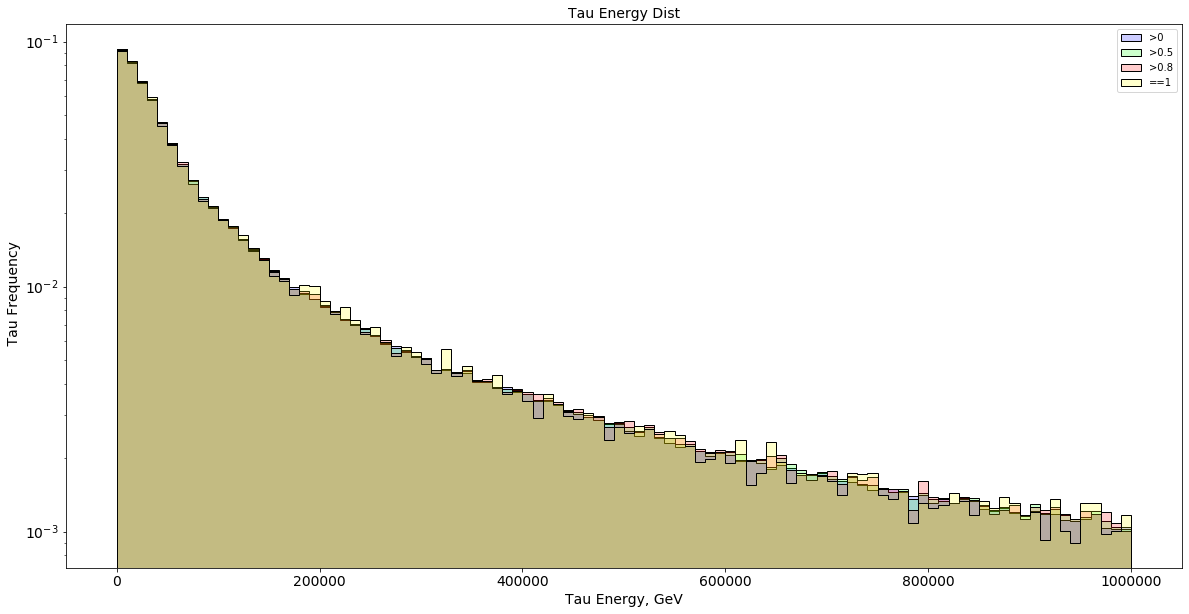

In [19]:
ax = df['tau_energy'].plot.hist(figsize = (20,10),bins = 100, range= [0,1000000], logy= True, weights = df['Weights'], histtype ='step',  fill=True, fc=(0, 0, 1, 0.2), edgecolor = 'k', label = ">0")#xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = df_05['tau_energy'].plot.hist(bins = 100, logy= True, range= [0,1000000],histtype ='step', weights = df_05['Weights'], fill=True, fc=(0, 1, 0, 0.2), edgecolor = 'k', label = ">0.5")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = df_08['tau_energy'].plot.hist(bins = 100, logy= True, range= [0,1000000],histtype ='step', weights = df_08['Weights'], fill=True, fc=(1, 0, 0, 0.2), edgecolor = 'k', label = ">0.8")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = df_1['tau_energy'].plot.hist(bins = 100, logy= True, range= [0,1000000],histtype ='step',  weights = df_1['Weights'], fill=True, fc=(1, 1, 0, 0.2), edgecolor = 'k', label = "==1")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax.set_title('Tau Energy Dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_xlabel("Tau Energy, GeV",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_ylabel(" Tau Frequency",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(labelsize=14)
plt.legend()

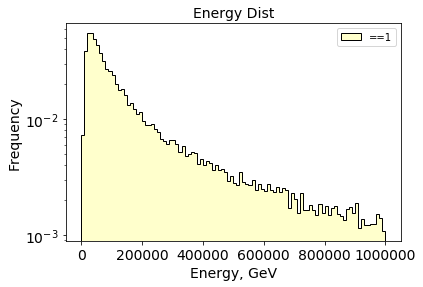

In [96]:
ax = df_1[b'Energy'].plot.hist(bins = 100, logy= True, range= [0,1000000],histtype ='step',  weights = df_1['Weights'], fill=True, fc=(1, 1, 0, 0.2), edgecolor = 'k', label = "==1")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax.set_title('Energy Dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_xlabel("Energy, GeV",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_ylabel("Frequency",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(labelsize=14)
plt.legend()

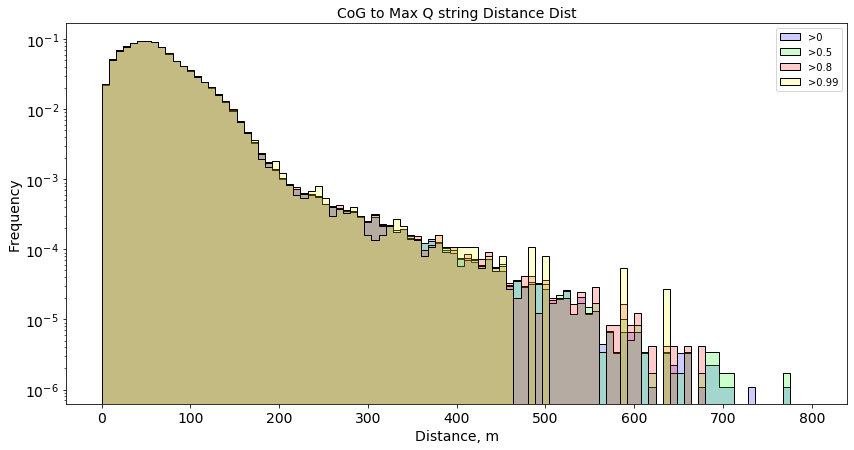

In [86]:
ax = df[b'Distance'].plot.hist(figsize = (14,7), bins = 100, range =[0,800], weights = df['Weights'], logy= True, histtype ='step', fill=True, fc=(0, 0, 1, 0.2), edgecolor = 'k', label = ">0")
ax = df_05[b'Distance'].plot.hist(bins = 100, range =[0,800], logy= True, weights = df_05['Weights'], histtype ='step',  fill=True, fc=(0, 1, 0, 0.2), edgecolor = 'k', label = ">0.5")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = df_08[b'Distance'].plot.hist(bins = 100, range =[0,800], logy= True, weights = df_08['Weights'], histtype ='step',  fill=True, fc=(1, 0, 0, 0.2), edgecolor = 'k', label = ">0.8")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = df_1[b'Distance'].plot.hist(bins = 100,range =[0,800], logy= True, weights = df_1['Weights'], histtype ='step',  fill=True, fc=(1, 1, 0, 0.2), edgecolor = 'k', label = ">0.99")#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
plt.legend()
ax.set_title('CoG to Max Q string Distance Dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_xlabel("Distance, m",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_ylabel("Frequency",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(labelsize=14)

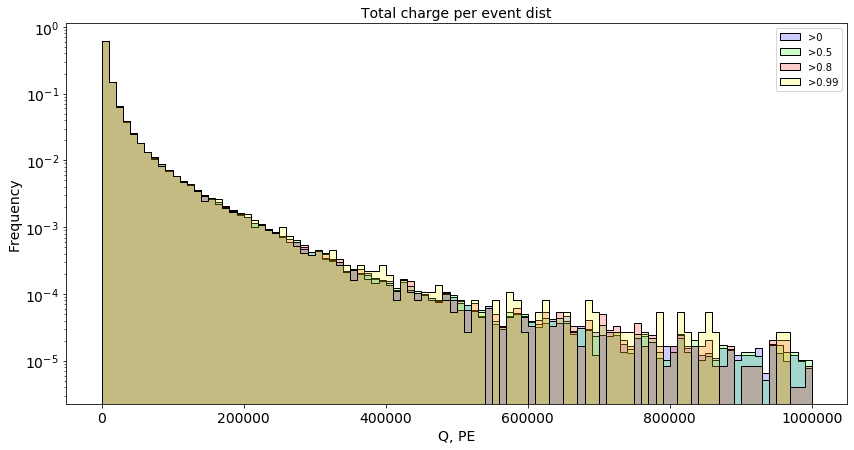

In [85]:
ax = df['Qtot_a'].plot.hist(figsize = (14,7), bins = 100, weights = df['Weights'], logy= True, histtype ='step', fill=True, fc=(0, 0, 1, 0.2), edgecolor = 'k', label = ">0", range =[0,1000000])
ax = df_05['Qtot_a'].plot.hist(bins = 100, logy= True, weights = df_05['Weights'], histtype ='step',  fill=True, fc=(0, 1, 0, 0.2), edgecolor = 'k', label = ">0.5", range =[0,1000000])#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = df_08['Qtot_a'].plot.hist(bins = 100, logy= True, weights = df_08['Weights'], histtype ='step',  fill=True, fc=(1, 0, 0, 0.2), edgecolor = 'k', label = ">0.8",range =[0,1000000])#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = df_1['Qtot_a'].plot.hist(bins = 100, logy= True, weights = df_1['Weights'], histtype ='step',  fill=True, fc=(1, 1, 0, 0.2), edgecolor = 'k', label = ">0.99",range =[0,1000000])#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
plt.legend()

ax.set_title('Total charge per event dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_xlabel("Q, PE",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_ylabel("Frequency",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(labelsize=14)

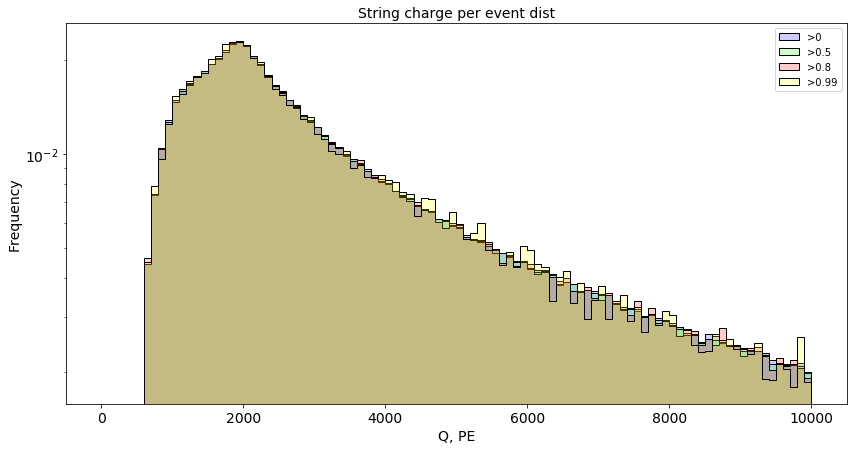

In [108]:
ax = df[b'Qst'].plot.hist(figsize = (14,7), bins = 100, weights = df['Weights'], logy= True, histtype ='step', fill=True, fc=(0, 0, 1, 0.2), edgecolor = 'k', label = ">0", range =[0,10000])
ax = df_05[b'Qst'].plot.hist(bins = 100, logy= True, weights = df_05['Weights'], histtype ='step',  fill=True, fc=(0, 1, 0, 0.2), edgecolor = 'k', label = ">0.5", range =[0,10000])#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = df_08[b'Qst'].plot.hist(bins = 100, logy= True, weights = df_08['Weights'], histtype ='step',  fill=True, fc=(1, 0, 0, 0.2), edgecolor = 'k', label = ">0.8",range =[0,10000])#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
ax = df_1[b'Qst'].plot.hist(bins = 100, logy= True, weights = df_1['Weights'], histtype ='step',  fill=True, fc=(1, 1, 0, 0.2), edgecolor = 'k', label = ">0.99",range =[0,10000])#, xlim =[0,1000], ylim = [10**(-4),10**(-0)])
plt.legend()

ax.set_title('String charge per event dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_xlabel("Q, PE",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.set_ylabel("Frequency",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(labelsize=14)

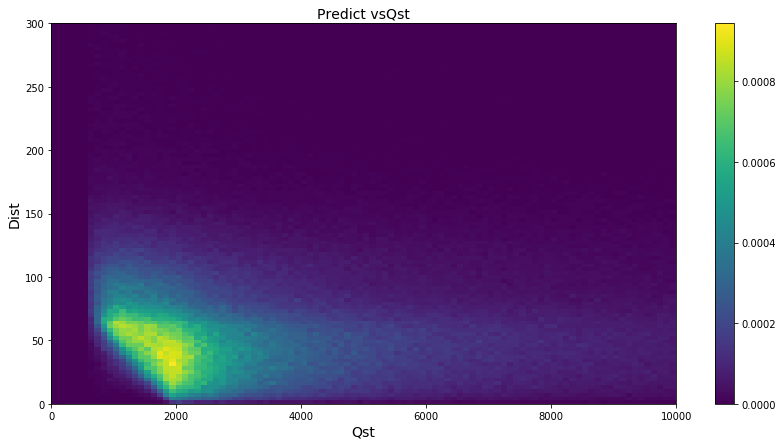

In [116]:
plt.figure(figsize=(14, 7))
plt.title('Predict vsQst', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.hist2d(x= df[b'Qst'], y= df[b'Distance'], weights = df['Weights'], bins =100, range=[[0,10000],[0,300]])
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Dist",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

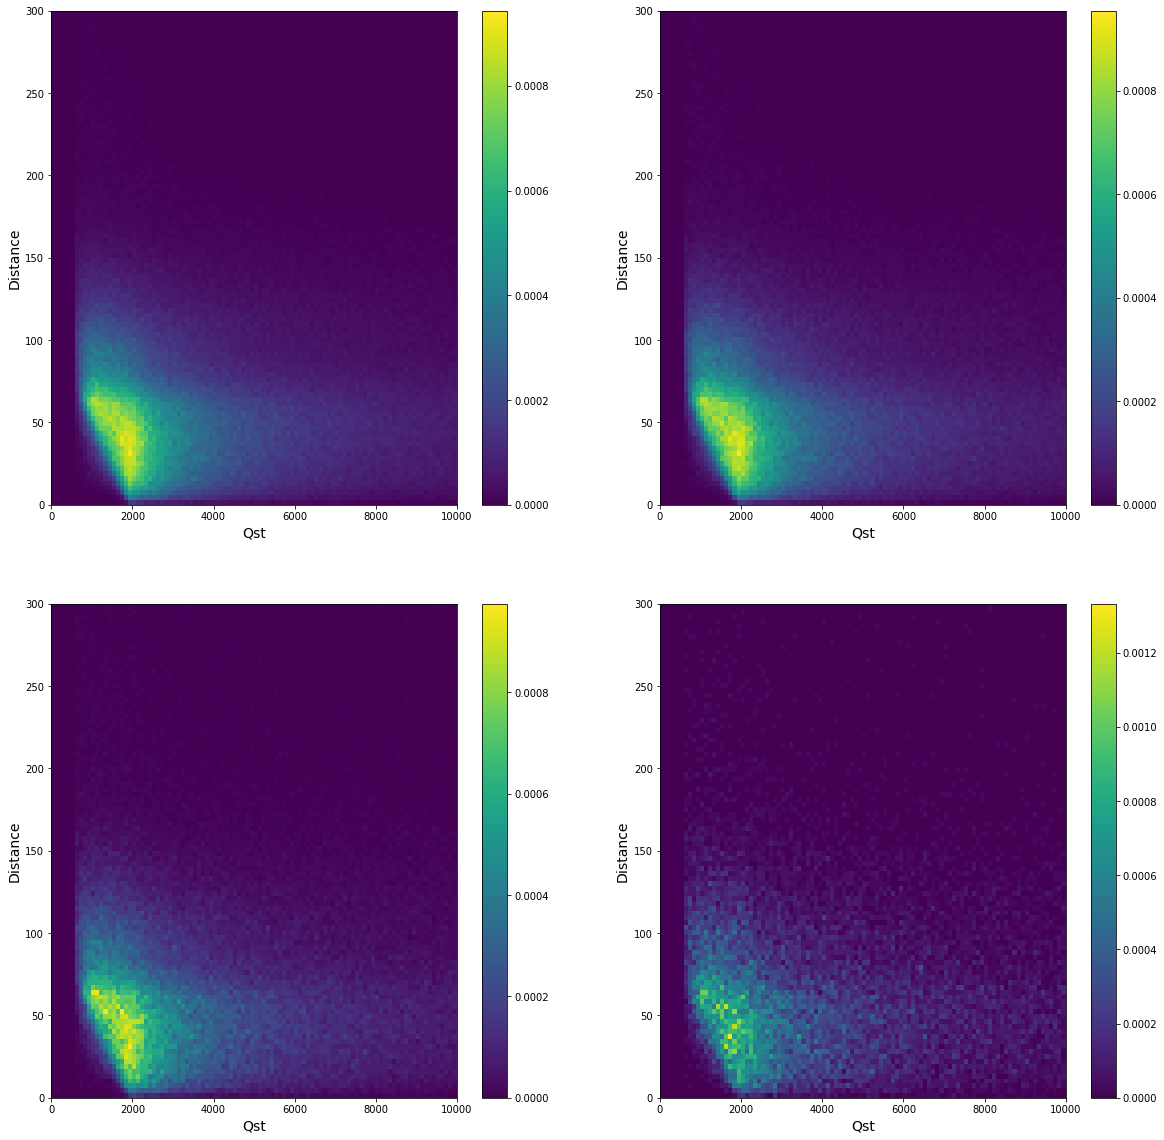

In [119]:
fig, ax = plt.subplots(nrows=2, ncols=2,sharex = True,sharey=True, figsize=(20,20))
plt.title('Qst/Distance dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(2,2,1)
plt.hist2d(x= df[b'Qst'], y= df[b'Distance'], weights = df['Weights'], bins =100, range=[[0,10000],[0,300]])#,vmax = 0.001)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,2,2)
plt.hist2d(x= df_05[b'Qst'], y= df_05[b'Distance'], weights = df_05['Weights'], bins =100, range=[[0,10000],[0,300]])#,vmax = 0.001)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,2,3)
plt.hist2d(x= df_08[b'Qst'], y= df_08[b'Distance'], weights = df_08['Weights'], bins =100, range=[[0,10000],[0,300]])#,vmax = 0.001)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,2,4)
plt.hist2d(x= df_1[b'Qst'], y= df_1[b'Distance'], weights = df_1['Weights'], bins =100, range=[[0,10000],[0,300]])#,vmax = 0.001)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.show()